In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils import plot_model

In [3]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_img, test_img = train_img.astype('float64')/255, test_img.astype('float64')/255
train_img, test_img = np.reshape(train_img, (60000, 28, 28)), np.reshape(test_img, (10000, 28, 28))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
Input_layer = layers.Input(shape=(28,28,1))

x_copy = Input_layer

Conv_layer1 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Input_layer)
Conv_layer2 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Conv_layer1)
Block1_output = layers.Add()([x_copy, Conv_layer2])

x_copy = Block1_output

Conv_layer3 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Block1_output)
Conv_layer4 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Conv_layer3)
Block2_output = layers.Add()([x_copy, Conv_layer4])

x_copy = Block2_output

Conv_layer5 = layers.Conv2D(64, (3,3), strides=(2,2), activation= 'relu', padding= 'same')(Block2_output)
Conv_layer6 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer5)
#Block3_output = layers.Add()([x_copy, Conv_layer6])

x_copy = Conv_layer6

Conv_layer7 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer6)
Conv_layer8 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer7)
Block3_output = layers.Add()([x_copy, Conv_layer8])

x_copy = Block3_output

Conv_layer9 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Block3_output)
Conv_layer10 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer9)
Block3_output = layers.Add()([x_copy, Conv_layer10])

x_copy = Conv_layer10


Conv_layer11 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer10)
Conv_layer12 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer11)
Block3_output = layers.Add()([x_copy, Conv_layer12])

flatten = layers.Flatten()(Block3_output)

cf = layers.Dense(10, activation= 'softmax')(flatten)


my_model = Model(inputs = Input_layer, outputs = cf)
my_model.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 28, 28, 32)     │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 28, 28, 32)     │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 28, 28, 32)     │              0 │ input_layer[0][0],     │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 32)     │          9,248 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 28, 28, 32)     │          9,248 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 28, 28, 32)     │              0 │ add[0][0],             │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 14, 14, 64)     │         18,496 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 14, 14, 64)     │              0 │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 14, 14, 64)     │              0 │ conv2d_9[0][0],        │
│                           │                        │                │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)    

 Total params: 430,506 (1.64 MB)

 Trainable params: 430,506 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

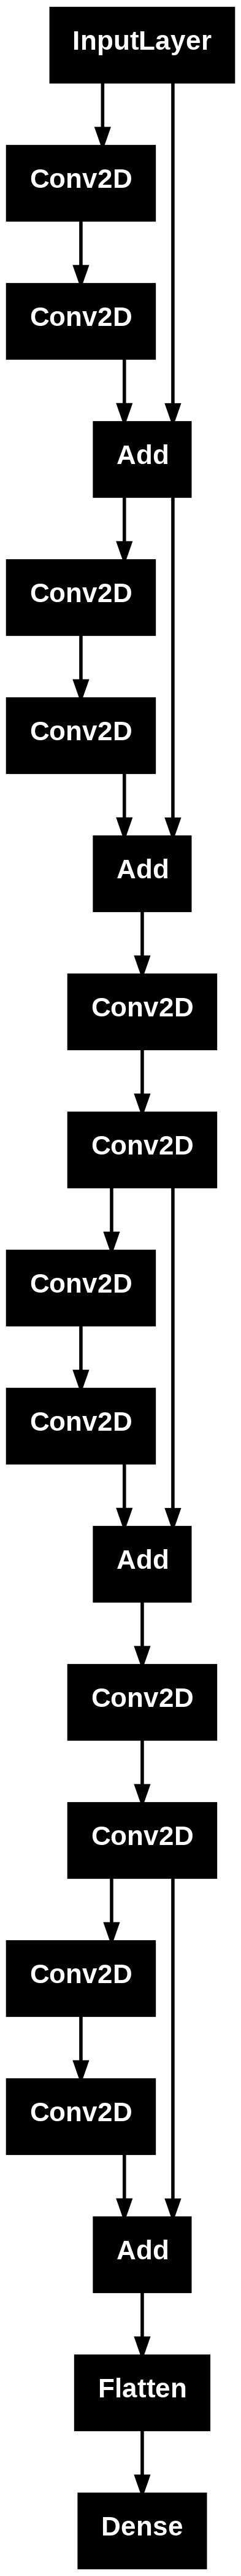

In [6]:
#plot_model(my_model)

In [7]:
my_model.compile(optimizer='adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
H = my_model.fit(train_img, train_labels, batch_size = 20, epochs = 2)

Epoch 1/2
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9270 - loss: 0.2301
Epoch 2/2
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9861 - loss: 0.0447


In [8]:

my_model.evaluate(test_img, test_labels, batch_size = 64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9835 - loss: 0.0504


[0.03778410702943802, 0.9883999824523926]